# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Sinta Ezra Wati Gulo]
- **Email:** [sintaezra04@gmail.com]
- **ID Dicoding:** [sinta_ezra]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda sepanjang tahun?
- Kapan periode dengan rata-rata penyewaan tertinggi dan terendah?
- Bagaimana pengaruh kondisi cuaca terhadap pola penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Menggunakan tren harian pada dataset day.csv untuk dianalisis berdasarkan kebutuhan pertanyaan bisnis.
# Membaca file day.csv ke dalam DataFrame dan menampilkan 5 baris pertamanya
day_df = pd.read_csv("data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

Dalam dataset day.csv memiliki kolom-kolom berikut:
- instant: Indeks rekaman.
- dteday: Tanggal.
- season: Musim (1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin).
- yr: Tahun (0 = 2011, 1 = 2012).
- mnth: Bulan (1 hingga 12).
- holiday: Indikator apakah hari tersebut adalah hari libur atau bukan (diambil dari sumber http://dchr.dc.gov/page/holiday-schedule).
- weekday: Hari dalam seminggu.
- workingday: Jika hari tersebut bukan akhir pekan maupun hari libur, bernilai 1, jika tidak, bernilai 0.
- weathersit (Kondisi cuaca):
  <br>1: Cerah, sedikit berawan, atau sebagian berawan.
  <br>2: Berkabut + berawan, berkabut + awan pecah, berkabut + sedikit berawan, berkabut.
  <br>3: Salju ringan, hujan ringan + badai petir + awan tersebar, hujan ringan + awan tersebar.
  <br>4: Hujan deras + butiran es + badai petir + kabut, salju + kabut.
- temp: Suhu yang telah dinormalisasi dalam Celsius (dibagi dengan 41 sebagai nilai maksimum).
- atemp: Suhu yang terasa (apparent temperature) yang telah dinormalisasi dalam Celsius (dibagi dengan 50 sebagai nilai maksimum).
- hum: Kelembaban udara yang telah dinormalisasi (dibagi dengan 100 sebagai nilai maksimum).
- windspeed: Kecepatan angin yang telah dinormalisasi (dibagi dengan 67 sebagai nilai maksimum).
- casual: Jumlah penyewaan sepeda oleh pengguna tidak terdaftar.
- registered: Jumlah penyewaan sepeda oleh pengguna terdaftar.
- cnt: Jumlah total sepeda yang disewa, termasuk pengguna tidak terdaftar dan terdaftar.

Jadi, ada 16 kolom pada day.csv.

### Assessing Data

In [3]:
# Memberikan informasi tentang day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Memeriksa apakah ada missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Memeriksa apakah ada data duplikat
print("Jumlah duplikasi = ", day_df.duplicated().sum())

Jumlah duplikasi =  0


In [6]:
# Memeriksa apakah tipe data sudah sesuai
print(day_df.dtypes)

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [7]:
# Memeriksa apakah ada outlier
# Ambil data cnt karena kolom ini adalah total sepeda yang dijual, yang mana menjadi fokus analisis saat ini
data = day_df['cnt']

# Hitung Q1, Q3
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)

# Hitung IQR dan batas outlier
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

# Identifikasi outlier
outliers = [x for x in data if x < minimum or x > maximum]

print(f"Q1: {q25}, Q3: {q75}, IQR: {iqr}")
print(f"Lower Bound: {minimum}, Upper Bound: {maximum}")
print("Outliers:", outliers)

Q1: 3152.0, Q3: 5956.0, IQR: 2804.0
Lower Bound: -1054.0, Upper Bound: 10162.0
Outliers: []


In [8]:
# Mencetak ringkasan statistik day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
# Memeriksa data dengan nilai hum = 0
print(day_df[day_df["hum"] == 0])

    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
68       69  2011-03-10       1   0     3        0        4           1   

    weathersit      temp     atemp  hum  windspeed  casual  registered  cnt  
68           3  0.389091  0.385668  0.0   0.261877      46         577  623  


**Insight:**
- Kolom cnt menjadi fokus analisis.
- Rata-rata penyewaan sepeda per hari adalah 4504 sepeda.
- Penyewaan sepeda terendah dalam sehari adalah 22 sepeda.
- Penyewaan sepeda tertinggi dalam sehari adalah 8714 sepeda.
- Tidak ada missing value.
- Tidak ada data duplikat.
- Tipe data kolom dteday belum sesuai, akan lebih baik jika tipenya adalah datetime.
- Tidak ada outlier.
- Tidak ada invalid value, terlihat dari hasil ringkasan bahwa value setiap kolom masih ada dalam rentang yang sudah ditentukan.
- Terdapat inaccurate value, yaitu pada bagian nilai minimal hum. Dimana secara normal hampir tidak mungkin kelembapan = 0, terutama pada kondisi cuaca dengan nilai 3 (salju ringan, hujan ringan + badai petir + awan tersebar, hujan ringan + awan tersebar).
- Nilai hum = 0 terjadi pada 2011-03-10.

### Cleaning Data

In [11]:
# Cari median hum dari day_df untuk weathersit = 3
median_hum_weathersit_3 = day_df[day_df['weathersit'] == 3]['hum'].median()

# Update nilai hum di day_df jika hum = 0 dan weathersit = 3
day_df.loc[(day_df['hum'] == 0) & (day_df['weathersit'] == 3), 'hum'] = median_hum_weathersit_3

In [12]:
# Memeriksa apakah masih ada nilai hum = 0
print(day_df[day_df['hum'] == 0])

Empty DataFrame
Columns: [instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, cnt]
Index: []


In [13]:
day_df[day_df['dteday'] == '2011-03-10'][['dteday', 'hum']]

,dteday,hum
68,2011-03-10,0.888333


In [14]:
# Mengubah tipe data dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print("Tipe data tabel day_df:", "\n", day_df.dtypes)

Tipe data tabel day_df: 
 instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [15]:
# Menghapus kolom yang tidak perlu dalam analisis
day_df.drop(columns=['instant', 'casual', 'registered'], inplace=True)

In [16]:
# Memeriksa kolom yang ada pada day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.4 KB


**Insight:**
- Mengganti nilai hum = 0 menggunakan median hum pada weathersit yang bernilai sama yaitu weathersit dengan nilai 3.
- Mengubah tipe data dteday menjadi datetime agar lebih sesuai.
- Menghapus kolom instant, casual, dan registered, karena tidak mempengaruhi analisis untuk pertanyaan bisnis yang didefinisikan diawal. Sehingga dapat menyederhanakan analisis dan menghilangkan informasi yang tidak relevan.

## Exploratory Data Analysis (EDA)

### Explore data day_df

In [17]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.629109,0.190486,4504.348837
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,22.000000
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.521041,0.134950,3152.000000
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.627500,0.180975,4548.000000
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730833,0.233214,5956.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000
std,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140845,0.077498,1937.211452


In [18]:
# Ringkasan statistik untuk jumlah penyewaan sepeda
print(day_df[['cnt']].describe())

               cnt
count   731.000000
mean   4504.348837
std    1937.211452
min      22.000000
25%    3152.000000
50%    4548.000000
75%    5956.000000
max    8714.000000


In [19]:
# Memeriksa data dengan penyewaan sepeda terendah
day_df[day_df["cnt"] == 22]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
667,2012-10-29,4,1,10,0,1,1,3,0.44,0.4394,0.88,0.3582,22


In [20]:
# Memeriksa data dengan penyewaan sepeda tertinggi
day_df[day_df["cnt"] == 8714]

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
623,2012-09-15,3,1,9,0,6,0,1,0.608333,0.585867,0.501667,0.247521,8714


In [21]:
# Rata-rata penyewaan sepeda per hari dalam seminggu
weekday_counts = day_df.groupby("weekday")["cnt"].mean().reset_index()
weekday_counts.columns = ["Weekday", "Average Rentals"]
print("\nRata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:")
print(weekday_counts)


Rata-rata Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:
   Weekday  Average Rentals
0        0      4228.828571
1        1      4338.123810
2        2      4510.663462
3        3      4548.538462
4        4      4667.259615
5        5      4690.288462
6        6      4550.542857


In [22]:
# Rata-rata penyewaan berdasarkan bulan
month_counts = day_df.groupby("mnth")["cnt"].mean().reset_index()
month_counts.columns = ["mnth", "Average Rentals"]
print("\nRata-rata Penyewaan Sepeda Berdasarkan Bulan:")
print(month_counts)


Rata-rata Penyewaan Sepeda Berdasarkan Bulan:
    mnth  Average Rentals
0      1      2176.338710
1      2      2655.298246
2      3      3692.258065
3      4      4484.900000
4      5      5349.774194
5      6      5772.366667
6      7      5563.677419
7      8      5664.419355
8      9      5766.516667
9     10      5199.225806
10    11      4247.183333
11    12      3403.806452


In [23]:
# Rata-rata penyewaan sepeda berdasarkan musim:
season_counts = day_df.groupby("season")["cnt"].mean().reset_index()
season_counts.columns = ["Season", "Average Rentals"]
print("\nRata-rata Penyewaan Sepeda Berdasarkan Musim:")
print(season_counts)


Rata-rata Penyewaan Sepeda Berdasarkan Musim:
   Season  Average Rentals
0       1      2604.132597
1       2      4992.331522
2       3      5644.303191
3       4      4728.162921


In [24]:
# Rata-rata penyewaan pada kondisi cuaca tertentu
weather_rentals = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_rentals.columns = ["Weather Condition", "Average Rentals"]
print(weather_rentals)

   Weather Condition  Average Rentals
0                  1      4876.786177
1                  2      4035.862348
2                  3      1803.285714


**Insight:**
- Dari hasil di atas, kita dapat melihat gambaran awal bahwa:
<br>- Rata-rata penyewaan per hari adalah 4504 sepeda.
<br>- Minimal penyewaan per hari adalah 22 sepeda. Penyewaan terendah terjadi pada musim dingin di hari Selasa dengan cuaca hujan deras + butiran es + badai petir + kabut, salju + kabut.
<br>- Maximal penyewaan per hari adalah 8714 sepeda. Penyewaan tertinggi terjadi pada musim gugur di hari Sabtu dengan kondisi cuaca cerah, sedikit berawan, atau sebagian berawan.
- Penyewaan sepeda cenderung meningkat dari Senin hingga Jumat, dengan puncaknya pada Jumat. Sabtu mengalami sedikit penurunan dibandingkan Jumat, tetapi tetap lebih tinggi dibandingkan hari lainnya. Minggu memiliki jumlah penyewaan terendah, kemungkinan karena aktivitas rutin masyarakat berbeda pada hari libur penuh.
- Penyewaan sepeda mulai meningkat signifikan dari bulan Maret (3692), April (4484), hingga mencapai puncaknya pada bulan Juni (5772) dan tetap tinggi hingga September (5766). Bulan Juni menjadi bulan dengan rata-rata penyewaan tertinggi (5772), diikuti oleh September (5766) dan Agustus (5664). Setelah September, jumlah penyewaan mulai menurun drastis, terutama di bulan November (4247) dan Desember (3403).
- 1: Musim Semi, 2: Musim Panas, 3: Musim Gugur, 4: Musim Dingin. Musim Semi memiliki penyewaan terendah, sekitar 3000-an. Hal ini mungkin karena cuaca masih dingin atau hujan yang menghambat aktivitas luar ruangan. Musim Panas menunjukkan peningkatan signifikan, dengan rata-rata penyewaan mencapai lebih dari 5000. Ini wajar karena musim panas cenderung lebih nyaman untuk bersepeda. Musim Gugur mencatat penyewaan tertinggi, mendekati 5500. Bisa jadi ini karena suhu masih nyaman dan belum terlalu dingin. Musim Dingin mengalami sedikit penurunan dibandingkan musim gugur, tetapi masih cukup tinggi, sekitar 5000-an. Ini mungkin karena meskipun dingin, orang tetap beraktivitas.
- Penyewaan sepeda tertinggi terjadi pada cuaca cerah atau sedikit berawan (kategori 1), dengan rata-rata 4.876 penyewaan per hari.
Penyewaan menurun pada cuaca berkabut atau mendung (kategori 2), dengan rata-rata 4.035 penyewaan per hari.
Penyewaan sepeda jauh lebih rendah pada cuaca buruk seperti hujan ringan atau salju ringan (kategori 3), dengan rata-rata hanya 1.803 penyewaan per hari.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda sepanjang tahun?

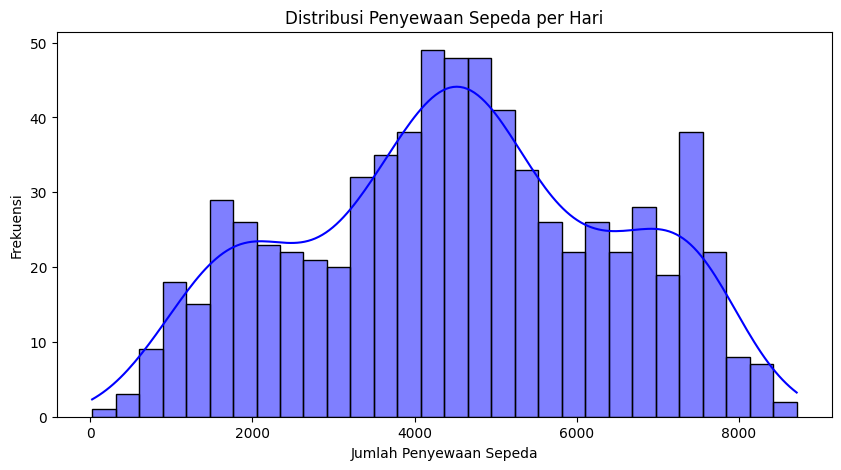

In [25]:
# Distribusi penyewaan sepeda per hari
plt.figure(figsize=(10, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True, color='blue')
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Penyewaan Sepeda per Hari")
plt.show()

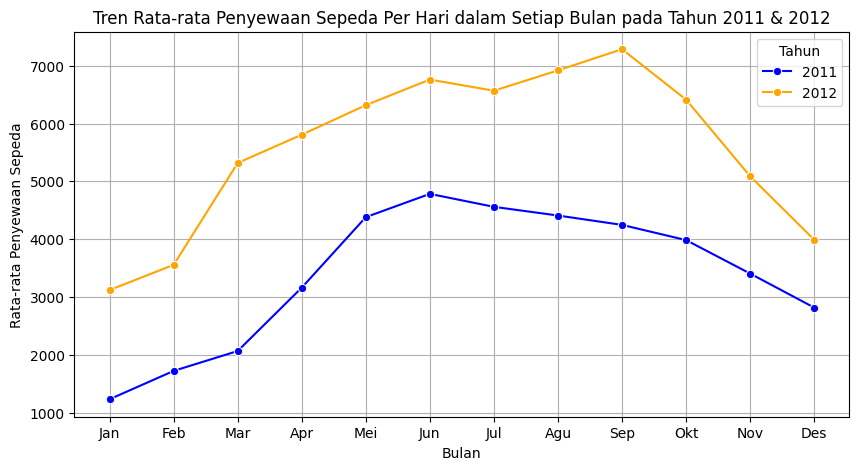

In [26]:
# Melihat tren penyewaan sepeda berdasarkan rata-rata penyewaan sepeda per hari dalam setiap bulan pada tahun 2011 dan 2012
# Mengelompokkan data berdasarkan tahun dan bulan, lalu menghitung rata-rata harian per bulan
monthly_avg = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

monthly_avg['yr'] = monthly_avg['yr'].map({0: 2011, 1: 2012})

# Plot Line Chart
plt.figure(figsize=(10, 5))
sns.lineplot(x=monthly_avg['mnth'], y=monthly_avg['cnt'], hue=monthly_avg['yr'], marker="o",  palette={2011: "blue", 2012: "orange"})
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Tren Rata-rata Penyewaan Sepeda Per Hari dalam Setiap Bulan pada Tahun 2011 & 2012")
plt.legend(title="Tahun")
plt.grid(True)

plt.show()

**Insight:**

Tren penggunaan sepeda sepanjang tahun
- Histogram menunjukkan distribusi jumlah penyewaan sepeda per hari. Pola distribusi ini tampak bimodal, dengan dua puncak utama di sekitar 4.000–5.000 dan 6.000–7.000 penyewaan per hari. Artinya, sebagian besar hari memiliki jumlah penyewaan dalam kisaran ini, tetapi ada juga beberapa hari dengan jumlah penyewaan sangat tinggi (mendekati 8.000–9.000) dan beberapa dengan penyewaan rendah (di bawah 2.000).
- Penggunaan sepeda mengalami tren naik mulai awal tahun, mencapai puncaknya pada pertengahan tahun (Juni–September), kemudian turun kembali menjelang akhir tahun. Hal ini kemungkinan besar dipengaruhi oleh kondisi cuaca. Musim panas dan gugur yang lebih hangat serta nyaman mendukung aktivitas bersepeda, sementara musim semi dan dingin, yang cenderung lebih dingin atau tidak menentu, membuat orang cenderung mengurangi penggunaan sepeda.
- Rata-rata penyewaan pada tahun 2012 lebih tinggi dibandingkan tahun 2011 di hampir semua bulan, menunjukkan peningkatan tren penggunaan sepeda dari tahun ke tahun. Ini menunjukkan pertumbuhan jumlah pengguna atau meningkatnya kepercayaan terhadap layanan penyewaan sepeda.

### Pertanyaan 2: Kapan periode dengan rata-rata penyewaan tertinggi dan terendah?

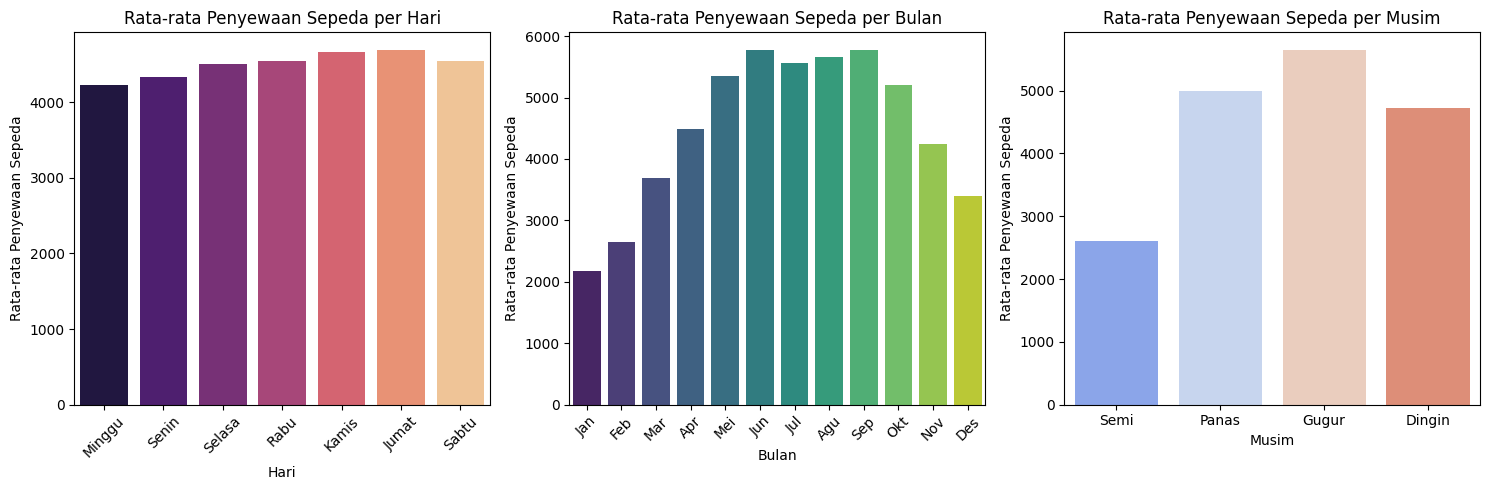

In [38]:
# Melihat periode penyewaan sepeda terendah dan tertinggi berdasarkan hari, bulan, dan musim 
# Mapping nama bulan, musim, dan hari sesuai keterangan dataset
bulan_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "Mei", 6: "Jun",
    7: "Jul", 8: "Agu", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Des"
}

musim_mapping = {
    1: "Semi", 2: "Panas", 3: "Gugur", 4: "Dingin" 
}

hari_mapping = {
    0: "Minggu", 1: "Senin", 2: "Selasa", 3: "Rabu", 
    4: "Kamis", 5: "Jumat", 6: "Sabtu"
}

# Hitung rata-rata penyewaan berdasarkan bulan, hari, dan musim
avg_by_month = day_df.groupby("mnth")["cnt"].mean().reindex(range(1, 13))  
avg_by_weekday = day_df.groupby("weekday")["cnt"].mean().reindex(range(0, 7))
avg_by_season = day_df.groupby("season")["cnt"].mean().reindex(range(1, 5))

# Set ukuran figure
plt.figure(figsize=(15, 5))

# Subplot 1: Penyewaan per hari dalam seminggu
plt.subplot(1, 3, 1)
sns.barplot(x=[hari_mapping[i] for i in avg_by_weekday.index], y=avg_by_weekday.values, hue=[hari_mapping[i] for i in avg_by_weekday.index], palette="magma", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda per Hari")

# Subplot 2: Penyewaan per bulan
plt.subplot(1, 3, 2)
sns.barplot(x=[bulan_mapping[i] for i in avg_by_month.index], y=avg_by_month.values, hue=[bulan_mapping[i] for i in avg_by_month.index], palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda per Bulan")

# Subplot 3: Penyewaan per musim
plt.subplot(1, 3, 3)
sns.barplot(x=[musim_mapping[i] for i in avg_by_season.index], y=avg_by_season.values, hue=[musim_mapping[i] for i in avg_by_season.index], palette="coolwarm", legend=False)
plt.xlabel("Musim")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda per Musim")

# Atur layout agar tidak saling tumpang tindih
plt.tight_layout()

# Tampilkan grafik
plt.show()

**Insight:**

Periode dengan jumlah penyewaan tertinggi dan terendah
- Berdasarkan hari dalam seminggu
  <br>Rata-rata penyewaan sepeda cenderung meningkat dari Senin hingga Sabtu, dengan puncaknya pada Jumat. Sedangkan rata-rata penyewaan terendah ada pada hari Minggu, kemungkinan karena lebih banyak orang beristirahat atau memiliki aktivitas lain yang mengurangi kebutuhan bersepeda.
- Berdasarkan bulan
  <br>Rata-rata penyewaan meningkat dari Januari hingga mencapai puncaknya pada bulan Juni hingga September. Penurunan signifikan terjadi mulai Oktober hingga Desember. Juni dan September menjadi bulan dengan rata-rata penyewaan tertinggi, sedangkan Januari memiliki rata-rata penyewaan terendah.
- Berdasarkan musim
  <br>Musim Gugur memiliki jumlah penyewaan tertinggi, diikuti oleh Musim Panas. Hal ini masuk akal karena cuaca pada musim ini umumnya lebih kondusif untuk bersepeda. Musim Semi memiliki jumlah penyewaan lebih rendah dibandingkan musim panas dan gugur, kemungkinan karena cuaca yang masih cenderung tidak stabil. Musim Dingin memiliki jumlah penyewaan terendah, yang dapat disebabkan oleh suhu dingin dan kondisi cuaca yang kurang mendukung aktivitas bersepeda.

### Pertanyaan 3: Bagaimana pengaruh kondisi cuaca terhadap pola penyewaan sepeda?

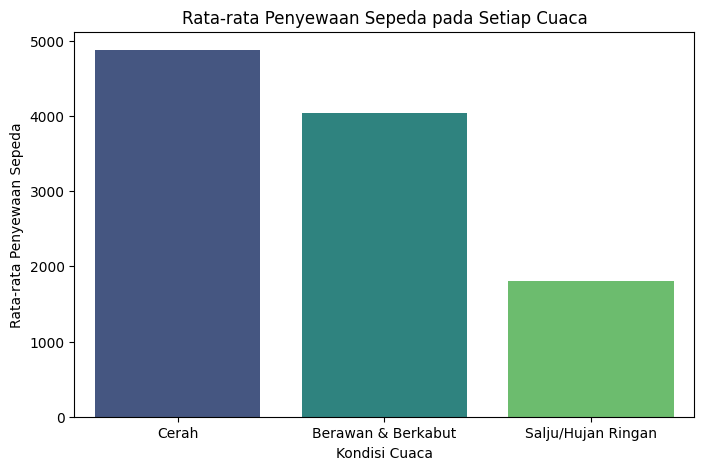

In [39]:
# Rata-rata penyewaan sepeda pada setiap kondisi cuaca
weather_labels = {1: "Cerah", 2: "Berawan & Berkabut", 3: "Salju/Hujan Ringan"}
weather_avg = day_df.groupby("weathersit")["cnt"].mean().reset_index()

# Ganti angka dengan nama musim
weather_avg["weathersit"] = weather_avg["weathersit"].replace(weather_labels)

plt.figure(figsize=(8, 5))
sns.barplot(x='weathersit', y='cnt', hue='weathersit', data=weather_avg, palette='viridis', legend=False)
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda pada Setiap Cuaca")
plt.show()

**Insight:**
- Rata-rata penyewaan sepeda tertinggi terjadi ketika cuaca cerah, sedikit berawan, atau sebagian berawan. Cuaca yang baik mendorong lebih banyak orang untuk beraktivitas di luar ruangan, termasuk bersepeda. Tidak ada hambatan seperti hujan atau jalanan licin yang bisa mengurangi kenyamanan dan keamanan pengguna sepeda. Kondisi ini ideal untuk pengguna sepeda rekreasi maupun orang yang mengandalkan sepeda sebagai transportasi sehari-hari.
- Rata-rata penyewaan sepeda terendah terjadi ketika cuaca hujan/salju ringan. Hujan atau salju membuat kondisi jalan lebih berbahaya dan licin, sehingga orang lebih memilih alternatif transportasi lain. Bersepeda saat hujan tidak nyaman, terutama bagi pengguna yang tidak memiliki perlengkapan tahan air. Cuaca buruk sering kali membuat orang mengurangi aktivitas luar ruangan secara keseluruhan.
- Sementara penyewaan sepeda ketika cuaca berkabut/berawan masih cukup tinggi. Kabut atau awan tidak selalu mengganggu aktivitas bersepeda, terutama jika tidak disertai hujan. Pengguna sepeda tetap menggunakan sepeda untuk mobilitas sehari-hari meskipun cuaca tidak sepenuhnya cerah. Kondisi berkabut atau berawan bisa lebih nyaman dibandingkan cuaca panas terik, sehingga beberapa pengguna justru tetap aktif.

## Conclusion

- Conclution pertanyaan 1
  <br>Penggunaan sepeda menunjukkan tren musiman yang jelas, dengan peningkatan yang stabil sejak awal tahun, mencapai puncaknya pada pertengahan tahun (Juni–September), lalu menurun menjelang akhir tahun. Faktor cuaca menjadi salah satu penyebab utama tren ini, di mana musim panas dan gugur yang lebih hangat mendukung aktivitas bersepeda, sementara musim dingin dan awal musim semi yang lebih dingin menyebabkan penurunan penggunaan. Selain itu, tren tahunan menunjukkan peningkatan jumlah penyewaan dari tahun ke tahun, mencerminkan pertumbuhan minat terhadap layanan penyewaan sepeda.
  
- Conclution pertanyaan 2
  <br>- Berdasarkan hari dalam seminggu, penyewaan sepeda tertinggi terjadi pada hari Jumat, sedangkan hari Minggu memiliki penyewaan terendah.
  <br>- Berdasarkan bulan, bulan Juli dan September mencatat rata-rata penyewaan tertinggi, sementara Januari memiliki penyewaan terendah.
  <br>- Berdasarkan musim, musim gugur memiliki jumlah penyewaan tertinggi, diikuti oleh musim panas. Sebaliknya, musim dingin memiliki jumlah penyewaan terendah akibat kondisi cuaca yang kurang mendukung.

  Secara keseluruhan, periode dengan penyewaan tertinggi adalah saat Musim Gugur, terutama dari bulan Juni hingga September, dengan puncaknya pada Juli-Agustus. Sedangkan periode dengan penyewaan terendah adalah saat Musim Dingin, khususnya pada bulan Desember dan Januari.

- Conclution pertanyaan 3
  <br>Penyewaan sepeda mencapai angka tertinggi saat cuaca cerah, sedikit berawan, atau sebagian berawan karena kondisi ini mendukung kenyamanan dan keamanan dalam bersepeda. Sementara itu, penyewaan menurun drastis saat cuaca hujan atau salju karena faktor keamanan dan kenyamanan yang berkurang. Cuaca berkabut atau berawan masih memungkinkan tingkat penyewaan yang cukup tinggi, selama tidak ada hujan yang mengganggu aktivitas bersepeda.
  <br>Hal ini menunjukkan bahwa semakin baik cuaca, maka semakin tinggi jumlah penyewaan sepeda. Cuaca yang cerah dan stabil menciptakan kondisi yang nyaman dan aman bagi pengguna, sehingga mereka lebih cenderung menggunakan sepeda baik untuk keperluan transportasi maupun rekreasi. Sebaliknya, cuaca buruk seperti hujan atau salju mengurangi kenyamanan dan meningkatkan risiko, sehingga jumlah penyewaan menurun secara signifikan.

In [58]:
day_df.to_csv("main_data.csv", index=False)